# Tarea 2: Least Squares
### Integrantes:
* Antonia Arango
* Felipe Miranda
* John Smith Ramírez

## Estudio económico-social de las viviendas en Bogotá

Bogotá, la capital de Colombia, es la ciudad con la mayor influencia sobre el PIB de Colombia [1], alrededor del 22%. Esto da una idea de un país centralizado y, como se conoce, altamente desigual. Esta desigualdad no solo se evidencia entre las diferentes ciudades del país, sino que también se puede ver reflejada en la misma capital.

A su vez, el área inmobiliaria es una de los segmentos más complejos económicamente hablando, dado que solo el 40% de los Colombianos tienen acceso a vivienda propia [2] y adicionalmente, muchas de las viviendas fueron construidas por albañiles o sus mismos residentes de manera autónoma. Se conoce que el colombiano promedio necesitaría ahorrar el salario entero que devenga durante 31 años (¡!) para lograr adquirir vivienda [3] propia. Debido a las características complejas y extremas, se decidió analizar, usando el método de los mínimos cuadrados, datos referentes a la asociación de los barrios y las áreas cuadradas de una vivienda con respecto a su costo. La función resultante de este método permitirá conocer los costos aproximados de las viviendas en la capital del país, lo cual puede resultar útil a nivel individual para quienes tengan planeado adquirir eventualmente un inmueble a nombre propio, como a un nivel social más amplio a la hora de realizar análisis más certeros y precisos de la realidad económica del país y las posibilidades de acceso de la población en general a vivienda propia y, eventualmente, tomar las medidas necesarias para que los costos de la vivienda se vuelvan asequibles a una proporción mayor de personas.

Bogotá es un distrito extenso, con $1636.35km^2$ de área, y es el más poblado del país, con aproximadamente ocho millones de habitantes [4]. Tiene 20 localidades y 1922 barrios. Debido a la extensa cantidad de barrios, se analizará desde las localidades. Estas son las siguientes:

| Localidad                | Estrato promedio |
| ------------------------ | ------------ |
| Usaquén                  |    3.9         |
| Chapinero               |      4.3       |
| Santa Fe                |      1.8       |
| San Cristóbal           |       1.8      |
| Usme                    |       1.5      |
| Tunjuelito              |       2.2      |
| Bosa                    |      1.6       |
| Kennedy                 |      2.7       |
| Fontibón                |       3.2      |
| Engativá                |     3.2        |
| Suba                    |       3.1      |
| Barrios Unidos          |       3.6      |
| Teusaquillo             |       3.6      |
| Los Mártires            |      3.4       |
| Antonio Nariño          |       3.4      |
| Puente Aranda           |      3.5       |
| La Candelaria           |       2.3      |
| Rafael Uribe Uribe      |       2.3      |
| Ciudad Bolívar          |       1.6      |
| Sumapaz                 |        --     |

Sumapaz no se analizará debido a que la gran mayoría de su extensión es de caracter rural y tiene una cantidad mínima de habitantes.

### Lectura de datos

Importamos los módulos necesarios

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

Se usará el csv "inmuebles_bogota.csv", obtenido de Kaggle [5]. Este contiene datos relacionados a la UPZ, el costo, el barrio, su tipo de inmueble, el área en $m^2$, el número de habitaciones, etc.

In [ ]:
try:
    df3 = pd.read_csv('inmuebles_bogota.csv')
    print(df3.head()) #Se muestran los primeros datos
except FileNotFoundError:
    print("Error: 'inmuebles_bogota.csv' not found. Please check the file path.")
except pd.errors.ParserError:
    print("Error: Could not parse 'inmuebles_bogota.csv'. Please check the file format.")

          Tipo                                 Descripcion  Habitaciones  \
0  Apartamento  Apartamento en venta en Zona Noroccidental             3   
1         Casa                   Casa en venta en Castilla             4   
2  Apartamento     Apartamento en venta en Chico Reservado             3   
3  Apartamento             Apartamento en venta en Usaquén             3   
4  Apartamento         Apartamento en venta en Bella Suiza             2   

   Baños  Área              Barrio                                    UPZ  \
0      2    70  Zona Noroccidental     CHAPINERO: Pardo Rubio + Chapinero   
1      3   170            Castilla            KENNEDY: Castilla + Bavaria   
2      3   144     Chico Reservado     CHAPINERO: Chicó Lago + El Refugio   
3      2   154             Usaquén                                Usaquén   
4      3   128         Bella Suiza  USAQUÉN: Country Club + Santa Bárbara   

             Valor  
0    $ 360.000.000  
1    $ 670.000.000  
2  $ 1.120.000.00

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


Se extrae la información correspondiente a las localidades y sus respectivos estratos promedios, debido a que no se conoce en el dataset el estrato preciso de cada inmueble [1].

In [ ]:
data = {
    'Localidad': ['Usaquén', 'Chapinero', 'Santa Fe', 'San Cristóbal', 'Usme', 'Tunjuelito', 'Bosa', 'Kennedy', 'Fontibón', 'Engativá', 'Suba', 'Barrios Unidos', 'Teusaquillo', 'Los Mártires', 'Antonio Nariño', 'Puente Aranda', 'La Candelaria', 'Rafael Uribe Uribe', 'Ciudad Bolívar'],
    'Estrato': [3.9, 4.3, 1.8, 1.8, 1.5, 2.2, 1.6, 2.7, 3.2, 3.2, 3.1, 3.6, 3.6, 3.4, 3.4, 3.5, 2.3, 2.3, 1.6]
}
df2 = pd.DataFrame(data)
df2

,Localidad,Estrato
0,Usaquén,3.9
1,Chapinero,4.3
2,Santa Fe,1.8
3,San Cristóbal,1.8
4,Usme,1.5
5,Tunjuelito,2.2
6,Bosa,1.6
7,Kennedy,2.7
8,Fontibón,3.2
9,Engativá,3.2


Se visualiza la manera en la que se distribuye el estrato promedio en las diferentes localidades de Bogotá.

In [1]:
# Crear diagrama de barras
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.bar(df2['Localidad'], df2['Estrato'])
plt.xlabel('Localidad')
plt.ylabel('Estrato')
plt.title('Estrato de Localidades en Bogotá')
plt.xticks(rotation=90)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

NameError: name 'df2' is not defined

<Figure size 1200x600 with 0 Axes>

Se ve que las UPZ tienen nombres varios. Por lo tanto, se deben estandarizar los nombres de las UPZ con respecto a su localidad.

In [ ]:
df3['UPZ'].unique()

array(['CHAPINERO: Pardo Rubio + Chapinero',
       'KENNEDY: Castilla + Bavaria',
       'CHAPINERO: Chicó Lago + El Refugio', 'Usaquén',
       'USAQUÉN: Country Club + Santa Bárbara', 'Tintala',
       'Kennedy Central', 'Teusaquillo', 'El Prado', 'Suba', 'Los Andes',
       'Engativá', 'Fontibón', 'Galerías', 'La Candelaria', 'Los Cedros',
       'La Alhambra',
       'SUBA: La Academia + Guaymaral + San José de Bavaria', 'Niza',
       'Modelia', 'Ciudad Salitre Oriental',
       'ENGATIVÁ: Santa Cecilia + Jardín  Botánico',
       'CIUDAD BOLÍVAR: Monteblanco + El Tesoro + El Mochuelo',
       'Bosa Central', 'Los Alcázares', 'San Cristóbal Norte',
       'PUENTE ARANDA: Zona Industrial + Puente Aranda',
       'USME: Alfonso López + Ciudad Usme', 'Arborizadora', 'El Rincón',
       'SANTA FE: Las Nieves + Sagrado Corazón', 'Restrepo',
       'Localidad Chapinero resto', 'La Sabana',
       'Ciudad Salitre Occidental', 'Sosiego', 'Boyacá Real', 'Timiza',
       'Quinta Paredes', 

In [ ]:
# Reemplazar los valores iniciales en el DataFrame
localidades_dict = {

    "Britalia": "Kennedy",
    "Localidad Chapinero resto": "Chapinero",
    "Localidad Usme resto": "Usme",
    "Venecia": "Tunjuelito",
    "San José": "Rafael Uribe Uribe",
    "La Macarena": "Santa Fe",
    "Santa Fé": "Santa Fe",
    "Ciudad Jardín": "Antonio Nariño",
    "Minuto de Dios": "Engativá",
    "Comuneros": "Puente Aranda",
    "Las Ferias": "Engativá",
    "Ismael Perdomo": "Ciudad Bolívar",
    "Fontibón San Pablo": "Fontibón",
    "Santa Isabel": "Los Mártires",
    "Bolivia": "Engativá",
    "La Floresta": "Barrios Unidos",
    "Garcés Navas": "Engativá",
    "Los Cedros": "Usaquén",
    "La Alhambra": "Suba",
    "Niza": "Suba",
    "Modelia": "Fontibón",
    "Ciudad Salitre Oriental": "Teusaquillo",
    "Ciudad Salitre Occidental": "Fontibón",
    "Bosa Central": "Bosa",
    "Bosa Occidental": "Bosa",
    "Los Alcázares": "Barrios Unidos",
    "San Cristóbal Norte": "Usaquén",
    "Arborizadora": "Ciudad Bolívar",
    "El Rincón": "Suba",
    "Restrepo": "Antonio Nariño",
    "La Sabana": "Los Mártires",
    "Sosiego": "Rafael Uribe Uribe",
    "Boyacá Real": "Engativá",
    "Timiza": "Kennedy",
    "Quinta Paredes": "Teusaquillo",
    "Quiroga": "Rafael Uribe Uribe",
    "Patio Bonito": "Kennedy",
    "Las Cruces": "Santa Fe",
    "Zona Franca": "Fontibón",
    "Lucero": "Ciudad Bolívar",
    "Verbenal": "Usaquén",
    "Tintala": "Kennedy",
    "El Prado": "Suba",
    "Los Andes": "Barrios Unidos",
    "Galerías": "Teusaquillo"

}

df3['UPZ'] = df3['UPZ'].replace(localidades_dict)
df3['UPZ'] = df3['UPZ'].replace('CHAPINERO: Pardo Rubio + Chapinero', 'Chapinero')
df3['UPZ'] = df3['UPZ'].replace('CHAPINERO: Chicó Lago + El Refugio', 'Chapinero')
df3['UPZ'] = df3['UPZ'].replace('USAQUÉN: Country Club + Santa Bárbara', 'Usaquén')
df3['UPZ'] = df3['UPZ'].replace('USME: Alfonso López + Ciudad Usme', 'Usme')
df3['UPZ'] = df3['UPZ'].replace('SANTA FE: Las Nieves + Sagrado Corazón', 'Santa Fe')
df3['UPZ'] = df3['UPZ'].replace('Casa Blanca Suba', 'Suba')
df3['UPZ'] = df3['UPZ'].replace('SUBA: La Academia + Guaymaral + San José de Bavaria', 'Suba')
df3['UPZ'] = df3['UPZ'].replace('CIUDAD BOLÍVAR: Monteblanco + El Tesoro + El Mochuelo', 'Ciudad Bolívar')
df3['UPZ'] = df3['UPZ'].replace('ENGATIVÁ: Santa Cecilia + Jardín  Botánico', 'Engativá')
df3['UPZ'] = df3['UPZ'].replace('PUENTE ARANDA: Zona Industrial + Puente Aranda', 'Puente Aranda')
df3['UPZ'] = df3['UPZ'].replace('KENNEDY: Castilla + Bavaria', 'Kennedy')
df3['UPZ'] = df3['UPZ'].replace('Kennedy Central', 'Kennedy')


Ahora se unen las tablas sobre "Localidad" y eliminamos las columnas que no se necesitarán en el análisis.

In [ ]:
df3.rename(columns={'UPZ': 'Localidad'}, inplace=True)
df3 = df3.join(df2.set_index('Localidad'), on='Localidad')
df3.drop(columns=['Descripcion', 'Barrio', 'Tipo'], inplace=True)

In [ ]:
df3.head()

,Habitaciones,Baños,Área,Localidad,Valor,Estrato
0,3,2,70,Chapinero,$ 360.000.000,4.3
1,4,3,170,Kennedy,$ 670.000.000,2.7
2,3,3,144,Chapinero,$ 1.120.000.000,4.3
3,3,2,154,Usaquén,$ 890.000.000,3.9
4,2,3,128,Usaquén,$ 970.000.000,3.9


Corregimos el formato de "Valor", que representa el costo del inmueble en COP, para que sea interpretable por python como un número.

In [ ]:
df3['Valor'] = df3['Valor'].str.replace('$', '')
df3['Valor'] = df3['Valor'].str.replace('.', '')
df3['Valor'] = df3['Valor'].str.replace(',', '')
df3['Valor'] = df3['Valor'].astype(int)
df3['Valor']

,Valor
0,360000000
1,670000000
2,1120000000
3,890000000
4,970000000
...,...
9515,290000000
9516,670000000
9517,900000000
9518,335000000


Se observa que los precios se disparan hasta valores atípicamente altos. Por lo tanto se analizarán los inmuebles con un costo inferior a $600.000.000 COP

In [ ]:
df3['Valor'].describe()

,Valor
count,9.520000e+03
mean,6.020624e+08
std,7.046021e+08
min,6.000000e+07
25%,2.500000e+08
50%,4.091825e+08
75%,6.800000e+08
max,1.600000e+10


In [ ]:
df3.drop(df3[df3['Valor'] > 6e8].index, inplace=True)

De igual manera, se observa que hay inmuebles con valores atípicos en su área. Se tendrán en cuenta los inmuebles con áreas menores a $150m^2$

In [ ]:
df3['Área'].describe()

,Área
count,6764.000000
mean,78.786221
std,133.636128
min,2.000000
25%,52.000000
50%,66.000000
75%,86.000000
max,6267.000000


In [ ]:
df3.drop(df3[df3['Área'] > 150].index, inplace=True)

Se eliminan los valores NaN

In [ ]:
df3.dropna(inplace=True)

### Análisis de los datos



#### Regresión polinomial cuadrática: área y precio

Mean Squared Error: 9678991947815278.0
R-squared: 0.4939991797734449


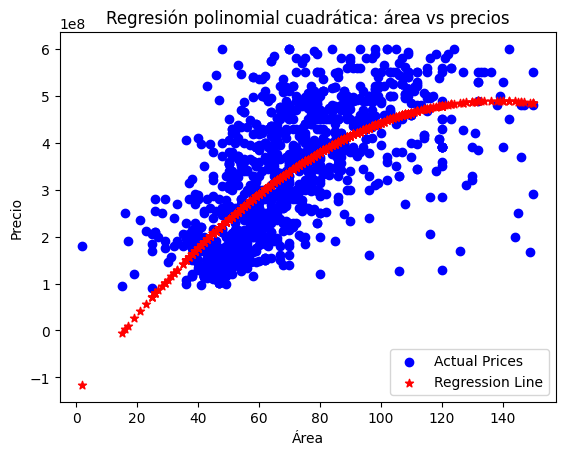

In [ ]:
# Prepare the data
df3 = df3.sort_values(by='Área')
X = df3['Área']  # Features (area)
y = df3['Valor']   # Target variable (price)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1777) # 80% train 20% test

# Create and train the linear regression model
p_coef = np.polyfit(X_train, y_train, 2)

# Make predictions on the test set
y_pred = np.polyval(p_coef, X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.scatter(X_test, y_pred, color='red', label='Regression Line', marker='*')
plt.xlabel('Área')
plt.ylabel('Precio')
plt.title('Regresión polinomial cuadrática: área vs precios')
plt.legend()
plt.show()

Se obtiene un valor para el error promedio cuadrado de 9835270014064190 y un valor R cuadrado de aprox 0.476.

#### Regresión lineal: área y precio

Mean Squared Error: 1.0568830528450052e+16
R-squared: 0.4474799705316125


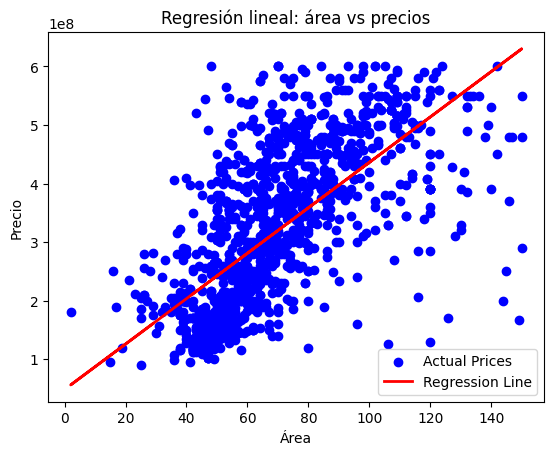

In [ ]:
X = df3[['Área']] # Features (area)
y = df3['Valor']   # Target variable (price)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1777) # 80% train 20% test

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Área')
plt.ylabel('Precio')
plt.title('Regresión lineal: área vs precios')
plt.legend()
plt.show()

Se obtiene un valor para el error promedio cuadrado superior a la regresión cuadrática y un valor R cuadrado de aprox 0.41.

#### Regresión multivariada: área, precio y estrato

Mean Squared Error: 8744860744615168.0
R-squared: 0.5428339300828677


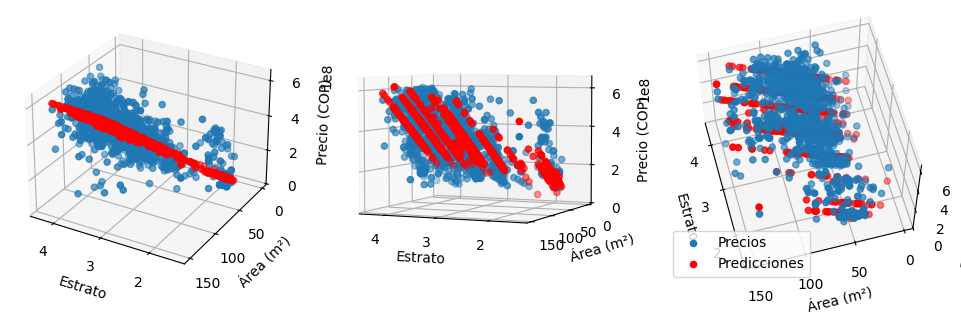

In [ ]:
X = df3[['Área', "Estrato"]] # Features (area)
y = df3['Valor']   # Target variable (price)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1777) # 80% train 20% test

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the regression line

fig = plt.figure(figsize=(12, 4))


ax3 = fig.add_subplot(133, projection='3d')
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
  # Scatter plot de los datos
  ax.scatter(X_test['Estrato'], X_test['Área'], y_test, label='Precios')

  # Scatter plot de los datos predichos
  ax.scatter(X_test['Estrato'], X_test['Área'], y_pred, color='red', label='Predicciones')

  # Añadir etiquetas a los ejes
  ax.set_xlabel('Estrato')
  ax.set_ylabel('Área (m²)')
  ax.set_zlabel('Precio (COP)')

# Añadir leyenda
ax.legend()

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

# Mostrar el gráfico
plt.show()

Se obtuvo un MSE menor, de 8900447882017451, y una R cuadrado de aproximadamente 0.53. Significa que aproxima de mejor manera los datos reales del precio.

#### Regresión multivariada cuadrática: área, precio y estrato

Mean Squared Error: 8205935451440154.0
R-squared: 0.5710080045998888


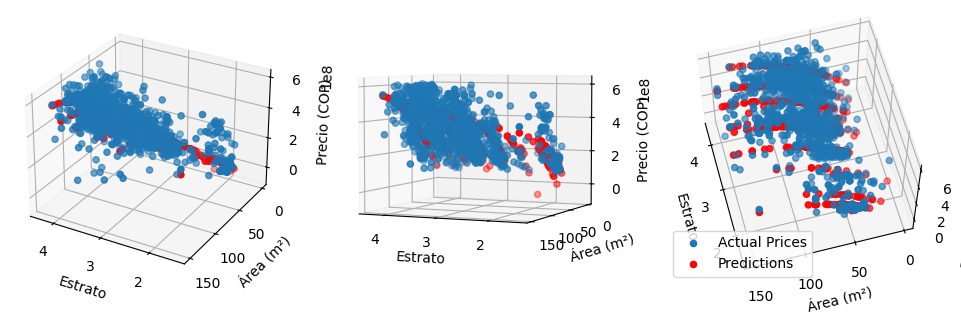

In [ ]:


# Define features and target variable
X = df3[['Área', "Estrato"]]  # Features (area and estrato)
y = df3['Valor']  # Target variable (price)

# Transform features to include polynomial terms
poly = PolynomialFeatures(degree=2, include_bias=False)  # Quadratic features
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=1777)

# Create and train the quadratic regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the regression results
fig = plt.figure(figsize=(12, 4))

ax3 = fig.add_subplot(133, projection='3d')
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    # Scatter plot of the actual data
    ax.scatter(X_test[:, 1], X_test[:, 0], y_test, label='Actual Prices')

    # Scatter plot of the predicted data
    ax.scatter(X_test[:, 1], X_test[:, 0], y_pred, color='red', label='Predictions')

    # Add axis labels
    ax.set_xlabel('Estrato')
    ax.set_ylabel('Área (m²)')
    ax.set_zlabel('Precio (COP)')

# Add legend
ax.legend()

# Set different view angles
ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

# Show the plot
plt.show()

De las variables analizadas, esta regresión obtiene el mejor fit, con MSE: 8175451966471243.0 y
R-squared: 0.5768361180065977

**Análisis de resultados**

Tras probar distintas aproximaciones con el modelo de los mínimos cuadrados, se evidencia que la mejor aproximación resulta de tomar más de una variable en cuenta para hacer la regresión; además, esta aproximación mejora significativamente al hacer la función cuadrática. Esto nos lleva a dos conclusiones importantes del problema en cuestión: por una parte, entre más variables sean tenidas en cuenta mejora la aproximación y, por otra parte, una aproximación lineal parece ser insuficiente.
Con lo dicho anteriormente, la aproximación cuadrática  que toma en cuenta estrato y área y es una aproximación cuadrática, además de ser la que más se aproxima al conjunto de datos y puede, por tanto, ser más precisa en predicciones, muestra cómo el precio de un inmueble crece de acuerdo a estos dos factores.

El problema en cuestión que decidimos abordar, esto es, el precio de la vivienda en relación con factores socioeconómicos, podrá ser más precisamente aproximado y analizado al tener en cuenta más variables. No obstante, aunque muchas de ellas pueden ser cuantitativas e integradas a la aproximación (por ejemplo, número de habitaciones, antigüedad del inmueble, última fecha de remodelación del inmueble, características de modernización de baños o cocinas, entre otras), otras son de carácter cualitativo de difícil traducción a un ámbito cualitativo (por ejemplo, la ubicación, la facilidad de acceso al transporte público en las cercanías del inmueble, la calidad de los materiales de construcción, la disponibilidad de lugares cercanos para necesidades relacionadas a salud, entretenimiento y demás, entre otros), y, finalmente, algunas se escapan de una predicción acertada que pueda ser incluida (por ejemplo, el establecimiento de precios arbitrarios por parte de inmobiliarias o particulares, la especulación inmobiliaria, o las dinámicas sociales que valorizan o desvalorizan los inmuebles en determinados sectores).
Una mejor aproximación debería tener en cuenta más variables, las más que sea posible, aunque esto, a la larga, haga que sea imposible visualizar la fluctuación de precios de acuerdo a ellas. No obstante, esto permitiría que la regresión cuadrática fuera más precisa; para superar esta dificultad se puede recurrir a recursos que condensen distintos grupos de variables en uno solo para facilitar su visualización*.

1.  Secretaría Distrital de Movilidad. Caracterización socioeconómica de Bogotá y la región – V8: Formulación del Plan Maestro de Movilidad para Bogotá D.C., que incluye ordenamiento de estacionamientos. Alcaldía Mayor de Bogotá, 2020.

2. [Colombia es novena en crecimiento de propietarios de vivienda entre los países OCDE](https://www.larepublica.co/globoeconomia/colombia-es-novena-en-crecimiento-de-propietarios-de-vivienda-entre-los-paises-ocde-4012155)

3. [¿Cuántos años debe ahorrar un trabajador para comprar una vivienda en Colombia si gana el salario mínimo?](https://www.elpais.com.co/economia/cuantos-anos-debe-ahorrar-un-trabajador-para-comprar-una-vivienda-en-colombia-si-gana-el-salario-minimo-0413.html)

4. [Bogotá (Wikipedia)](https://es.wikipedia.org/wiki/Bogot%C3%A1)

5. [Real Estate Bogotá (Kaggle Dataset)](https://www.kaggle.com/datasets/pablobravo73/real-estate-bogota)